## CNN's on MNIST

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# some model parameters
input_dim = X_train.shape[1]
num_clas = 10
batch_size = 128 
no_epoch = 20
img_row, img_col = 28,28

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_row, img_col)
    x_test = x_test.reshape(x_test.shape[0], 1, img_row, img_col)
    input_shape = (1, img_row, img_col)
else:
    X_train = X_train.reshape(X_train.shape[0], img_row, img_col, 1)
    x_test = x_test.reshape(x_test.shape[0], img_row, img_col, 1)
    input_shape = (img_row, img_col, 1)

In [5]:
print("Number of training examples :", X_train.shape[0], X_train.shape[1], X_train.shape[2])

Number of training examples : 60000 28 28


In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (28)
Number of training examples : 10000 and each image is of shape (28)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
x_test = x_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = keras.utils.to_categorical(y_train, num_clas) 
y_test = keras.utils.to_categorical(y_test, num_clas)

print("After converting the output into a vector : ", type(y_train))

Class label of first image : 5
After converting the output into a vector :  <class 'numpy.ndarray'>


In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## 3-layer ConvNet + Relu + adam 
**No Batch normalization and Dropout **

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_mdl_res(x_val, trn_los, tst_los, tst_scr, tst_acc):
    # Visualize loss history
    plt.figure(figsize=(16,16))
    plt.plot(x_val, trn_los, 'r--')
    plt.plot(x_val, tst_los, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid()
    plt.show();

    print('Test score:', tst_scr) 
    print('Test accuracy:', tst_acc)

In [0]:
#ConvNet
mdl_1 = Sequential()
mdl_1.add(Conv2D(32,kernel_size=(7,7), activation='relu',input_shape=(input_shape))) 
mdl_1.add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
mdl_1.add(MaxPooling2D(pool_size=(2,2)))
mdl_1.add(Conv2D(128,kernel_size=(5,5), activation='relu')) 
mdl_1.add(Flatten())
mdl_1.add(Dense(128, activation='relu')) 
mdl_1.add(Dense(num_clas,activation='softmax'))
mdl_1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 5, 128)         204928    
_________________________________________________________________
flatten_10 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               409728    
_________________________________________________________________
dense_20 (Dense)             (None, 10)              

In [0]:
#set optimizer and loss
mdl_1.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:

history = mdl_1.fit(X_train,y_train,batch_size=batch_size,epochs=no_epoch,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1582 - acc: 0.9500 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 2/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0429 - acc: 0.9873 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 3/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0308 - acc: 0.9905 - val_loss: 0.0287 - val_acc: 0.9912
Epoch 4/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0183 - acc: 0.9941 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 6/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 7/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0132 - acc: 0.9960 - val_loss: 0.0319 -

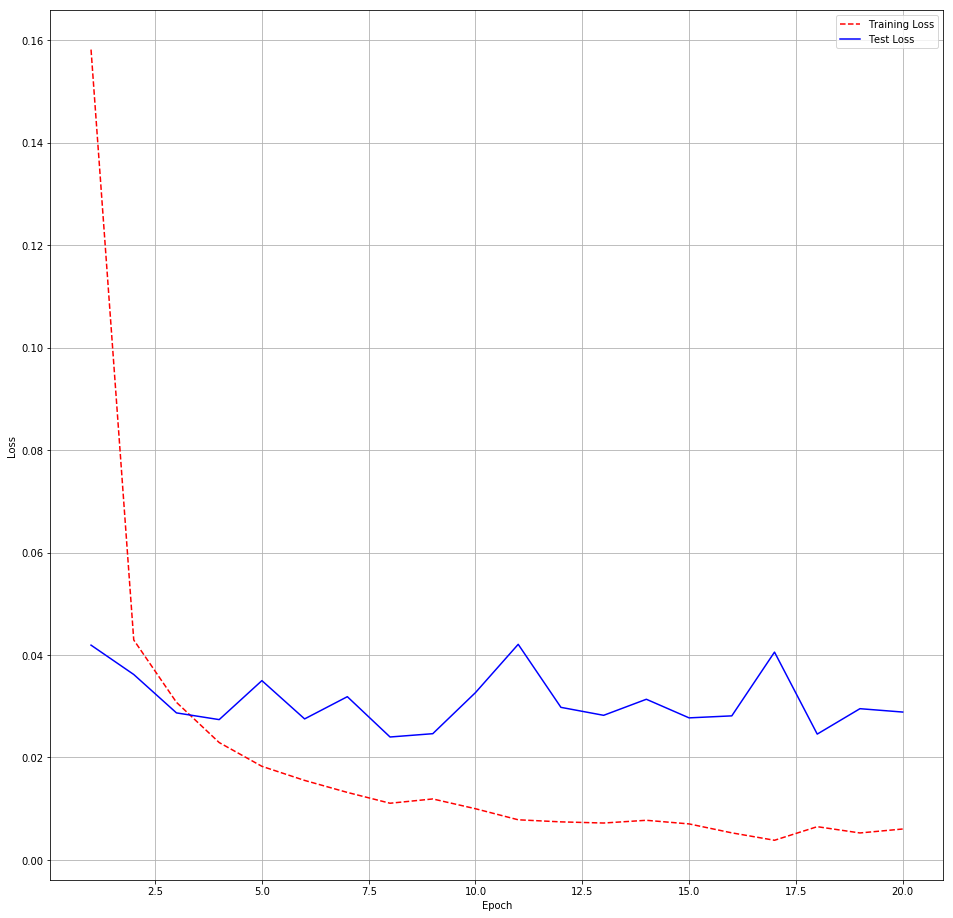

Test score: 0.028870063201270432
Test accuracy: 0.9938


In [0]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt

epoch_count = list(range(1,no_epoch+1))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
score = mdl_1.evaluate(x_test, y_test, verbose=0)
plt_mdl_res(epoch_count, training_loss, test_loss, score[0], score[1])


### Hyper Parameter tuning Dropout rate for 3-Layer convNNet

In [ ]:
no_cnvnets = 8
mdl = [0] *no_cnvnets
history = [0] * no_cnvnets
nme = ["Dropout=0.0","Dropout=0.1","Dropout=0.2","Dropout=0.3","Dropout=0.4","Dropout=0.5","Dropout=0.6","Dropout=0.7"]

for i in range(no_cnvnets):
    #ConvNet
    mdl[i] = Sequential()
    mdl[i].add(Conv2D(32,kernel_size=(7,7), activation='relu',input_shape=(input_shape))) 
    mdl[i].add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
    mdl[i].add(MaxPooling2D(pool_size=(2,2)))
    mdl[i].add(Conv2D(128,kernel_size=(5,5), activation='relu')) 
    mdl[i].add(Flatten())
    mdl[i].add(Dense(128, activation='relu')) 
    mdl[i].add(Dropout(rate=(i*0.01)))
    mdl[i].add(Dense(num_clas,activation='softmax'))
    mdl[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

for j in range(no_cnvnets):
    history[j] = mdl[j].fit(X_train,y_train, batch_size=batch_size, epochs = no_epoch, 
    validation_data = (x_test,y_test), verbose=1)
    
for k in range(no_cnvnets):
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        nme[k],no_epoch,max(history[k].history['acc']),max(history[k].history['val_acc']) ))

CNN Dropout=0.0: Epochs=20, Train accuracy=0.99913, Validation accuracy=0.99410
CNN Dropout=0.1: Epochs=20, Train accuracy=0.99910, Validation accuracy=0.99360
CNN Dropout=0.2: Epochs=20, Train accuracy=0.99882, Validation accuracy=0.99400
CNN Dropout=0.3: Epochs=20, Train accuracy=0.99883, Validation accuracy=0.99290
CNN Dropout=0.4: Epochs=20, Train accuracy=0.99878, Validation accuracy=0.99330
CNN Dropout=0.5: Epochs=20, Train accuracy=0.99910, Validation accuracy=0.99320
CNN Dropout=0.6: Epochs=20, Train accuracy=0.99915, Validation accuracy=0.99340
CNN Dropout=0.7: Epochs=20, Train accuracy=0.99865, Validation accuracy=0.99340

## 3-Layer ConvNet + ReLu + Adam + Dropout 
**No Batch Normalization with Dropout rate 0.0**

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
no_epoch = 20

In [0]:
#ConvNet
mdl_2 = Sequential()
mdl_2.add(Conv2D(32,kernel_size=(7,7), activation='relu',input_shape=(input_shape))) 
mdl_2.add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
mdl_2.add(MaxPooling2D(pool_size=(2,2)))
mdl_2.add(Conv2D(128,kernel_size=(5,5), activation='relu')) 
mdl_2.add(Dropout(rate=0.0))
mdl_2.add(Flatten())
mdl_2.add(Dense(128, activation='relu')) 
mdl_2.add(Dropout(rate=0.0))
mdl_2.add(Dense(num_clas,activation='softmax'))
mdl_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 5, 128)         204928    
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)             

In [0]:
#set optimizer and loss
mdl_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:

history_2 = mdl_2.fit(X_train,y_train,batch_size=batch_size,epochs=no_epoch,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1612 - acc: 0.9502 - val_loss: 0.0455 - val_acc: 0.9856
Epoch 2/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0287 - val_acc: 0.9913
Epoch 4/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0225 - acc: 0.9932 - val_loss: 0.0336 - val_acc: 0.9882
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0451 - val_acc: 0.9870
Epoch 6/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0144 - acc: 0.9956 - val_loss: 0.0331 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0134 - acc: 0.9959 - val_loss: 0.0363 -

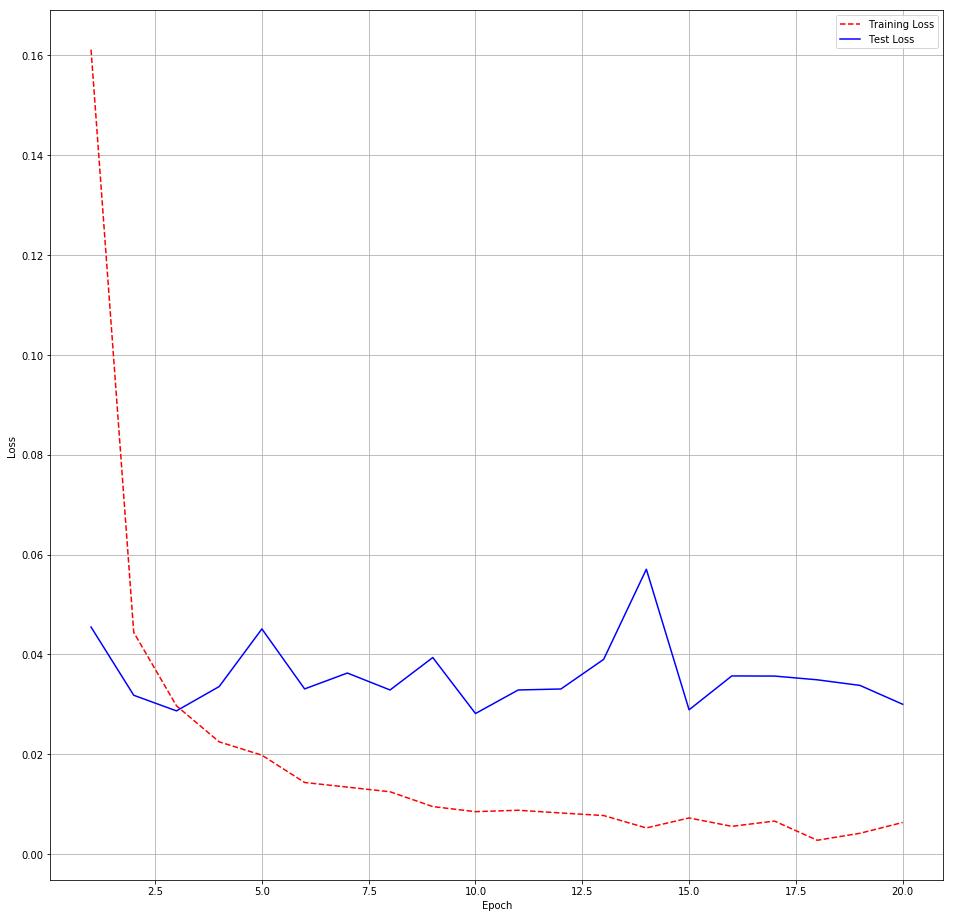

Test score: 0.030026011430384324
Test accuracy: 0.9928


In [0]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt

epoch_count = list(range(1,no_epoch+1))

# Get training and test loss histories
training_loss = history_2.history['loss']
test_loss = history_2.history['val_loss']

# Create count of the number of epochs
score = mdl_2.evaluate(x_test, y_test, verbose=0)
plt_mdl_res(epoch_count, training_loss, test_loss, score[0], score[1])


## 5-Layer ConvNNet + ReLu + Adam 
**Batch Normalization with No DropOut**

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
no_epoch = 20

#ConvNet
mdl_3 = Sequential()
mdl_3.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(input_shape))) 
mdl_3.add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
mdl_3.add(MaxPooling2D(pool_size=(2,2)))
mdl_3.add(Conv2D(32,kernel_size=(5,5), activation='relu')) 
mdl_3.add(BatchNormalization())
mdl_3.add(Conv2D(64,kernel_size=(3,3), activation='relu')) 
mdl_3.add(MaxPooling2D(pool_size=(2,2)))
mdl_3.add(Conv2D(128,kernel_size=(2,2), activation='relu')) 
mdl_3.add(BatchNormalization())
mdl_3.add(Flatten())
mdl_3.add(Dense(128, activation='relu')) 
mdl_3.add(Dense(num_clas,activation='softmax'))
mdl_3.summary()

mdl_3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = mdl_3.fit(X_train,y_train,batch_size=batch_size,epochs=no_epoch,verbose=1,validation_data=(x_test,y_test))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 64)       

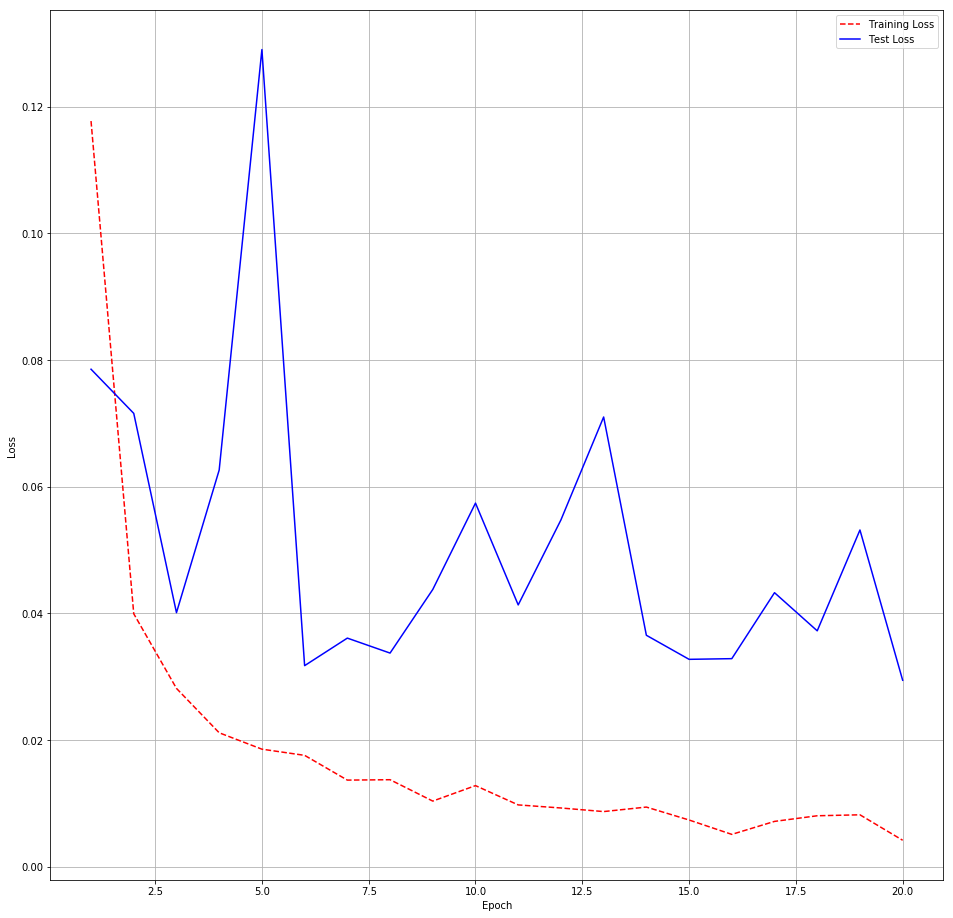

Test score: 0.029422459162015413
Test accuracy: 0.9934


In [0]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt

epoch_count = list(range(1,no_epoch+1))

# Get training and test loss histories
training_loss = history_3.history['loss']
test_loss = history_3.history['val_loss']

# Create count of the number of epochs
score = mdl_3.evaluate(x_test, y_test, verbose=0)
plt_mdl_res(epoch_count, training_loss, test_loss, score[0], score[1])


## 7-Layer ConvNNet + Adam + Relu 
**Batch Normalization with Dropout rate 0.0**

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
no_epoch = 20

#ConvNet
mdl_4 = Sequential()
mdl_4.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(input_shape))) 
mdl_4.add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
mdl_4.add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
mdl_4.add(Dropout(rate=0.0))

mdl_4.add(Conv2D(64,kernel_size=(3,3), activation='relu')) 
mdl_4.add(Conv2D(64,kernel_size=(3,3), activation='relu')) 

mdl_4.add(Dropout(rate=0.0))
mdl_4.add(BatchNormalization())

mdl_4.add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
mdl_4.add(Conv2D(128,kernel_size=(2,2), activation='relu')) 

mdl_4.add(BatchNormalization())
mdl_4.add(Flatten())
mdl_4.add(Dense(128, activation='relu')) 
mdl_4.add(Dense(num_clas,activation='softmax'))

mdl_4.summary()


mdl_4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history_4 = mdl_4.fit(X_train,y_train,batch_size=batch_size,epochs=no_epoch,verbose=1,validation_data=(x_test,y_test))


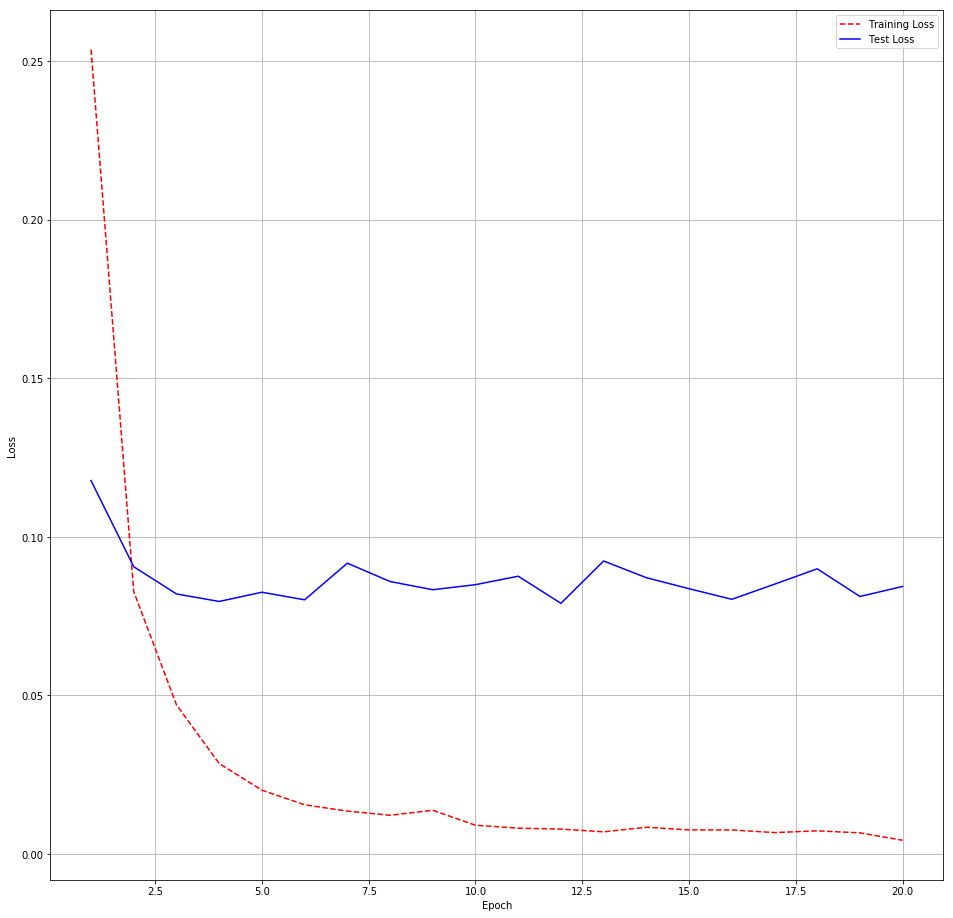

Test score: 0.08437914842601021
Test accuracy: 0.981


In [0]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt

epoch_count = list(range(1,no_epoch+1))

# Get training and test loss histories
training_loss = history_4.history['loss']
test_loss = history_4.history['val_loss']

# Create count of the number of epochs
score = mdl_4.evaluate(x_test, y_test, verbose=0)
plt_mdl_res(epoch_count, training_loss, test_loss, score[0], score[1])


## Hyperparameter tuning Dropout  rate for 7-Layer ConvNNet

In [ ]:
no_cnvnets = 8
mdl = [0] *no_cnvnets
history = [0] * no_cnvnets
nme = ["Dropout=0.0","Dropout=0.1","Dropout=0.2","Dropout=0.3","Dropout=0.4","Dropout=0.5","Dropout=0.6","Dropout=0.7"]

for i in range(no_cnvnets):
    #ConvNet
    mdl[i] = Sequential()
    mdl[i].add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(input_shape))) 
    mdl[i].add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
    mdl[i].add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
    mdl[i].add(Dropout(rate=(i*0.01)))

    mdl[i].add(Conv2D(64,kernel_size=(3,3), activation='relu')) 
    mdl[i].add(Conv2D(64,kernel_size=(3,3), activation='relu')) 

    mdl[i].add(Dropout(rate=(i*0.01)))
    mdl[i].add(BatchNormalization())

    mdl[i].add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
    mdl[i].add(Conv2D(128,kernel_size=(2,2), activation='relu')) 

    mdl[i].add(BatchNormalization())
    mdl[i].add(Flatten())
    mdl[i].add(Dense(128, activation='relu')) 
    mdl[i].add(Dense(num_clas,activation='softmax'))
    mdl[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

for j in range(no_cnvnets):
    history[j] = mdl[j].fit(X_train,y_train, batch_size=batch_size, epochs = no_epoch, 
    validation_data = (x_test,y_test), verbose=1)
    print('Processed model:',j)
    
for k in range(no_cnvnets):
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        nme[k],no_epoch,max(history[k].history['acc']),max(history[k].history['val_acc']) ))

CNN Dropout=0.0: Epochs=20, Train accuracy=0.99800, Validation accuracy=0.99200
CNN Dropout=0.1: Epochs=20, Train accuracy=0.99852, Validation accuracy=0.99160
CNN Dropout=0.2: Epochs=20, Train accuracy=0.99865, Validation accuracy=0.99290
CNN Dropout=0.3: Epochs=20, Train accuracy=0.99782, Validation accuracy=0.99240
CNN Dropout=0.4: Epochs=20, Train accuracy=0.99820, Validation accuracy=0.99130
CNN Dropout=0.5: Epochs=20, Train accuracy=0.99792, Validation accuracy=0.99090
CNN Dropout=0.6: Epochs=20, Train accuracy=0.99817, Validation accuracy=0.99080
CNN Dropout=0.7: Epochs=20, Train accuracy=0.99783, Validation accuracy=0.99270

## 7-Layer ConvNNet + Adam + Relu 
**Batch Normalization with Dropout rate 0.2**

In [19]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
no_epoch = 20

#ConvNet
mdl_5 = Sequential()
mdl_5.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(input_shape))) 
mdl_5.add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
mdl_5.add(Conv2D(32,kernel_size=(3,3), activation='relu')) 
mdl_5.add(Dropout(rate=0.2))

mdl_5.add(Conv2D(64,kernel_size=(3,3), activation='relu')) 
mdl_5.add(Conv2D(64,kernel_size=(3,3), activation='relu')) 

mdl_5.add(Dropout(rate=0.2))
mdl_5.add(BatchNormalization())

mdl_5.add(Conv2D(64,kernel_size=(5,5), activation='relu')) 
mdl_5.add(Conv2D(128,kernel_size=(2,2), activation='relu')) 

mdl_5.add(BatchNormalization())
mdl_5.add(Flatten())
mdl_5.add(Dense(128, activation='relu')) 
mdl_5.add(Dense(num_clas,activation='softmax'))

mdl_5.summary()


mdl_5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = mdl_5.fit(X_train,y_train,batch_size=batch_size,epochs=no_epoch,verbose=1,validation_data=(x_test,y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
dropout_8 (Dropout)          (None, 18, 18, 64)       

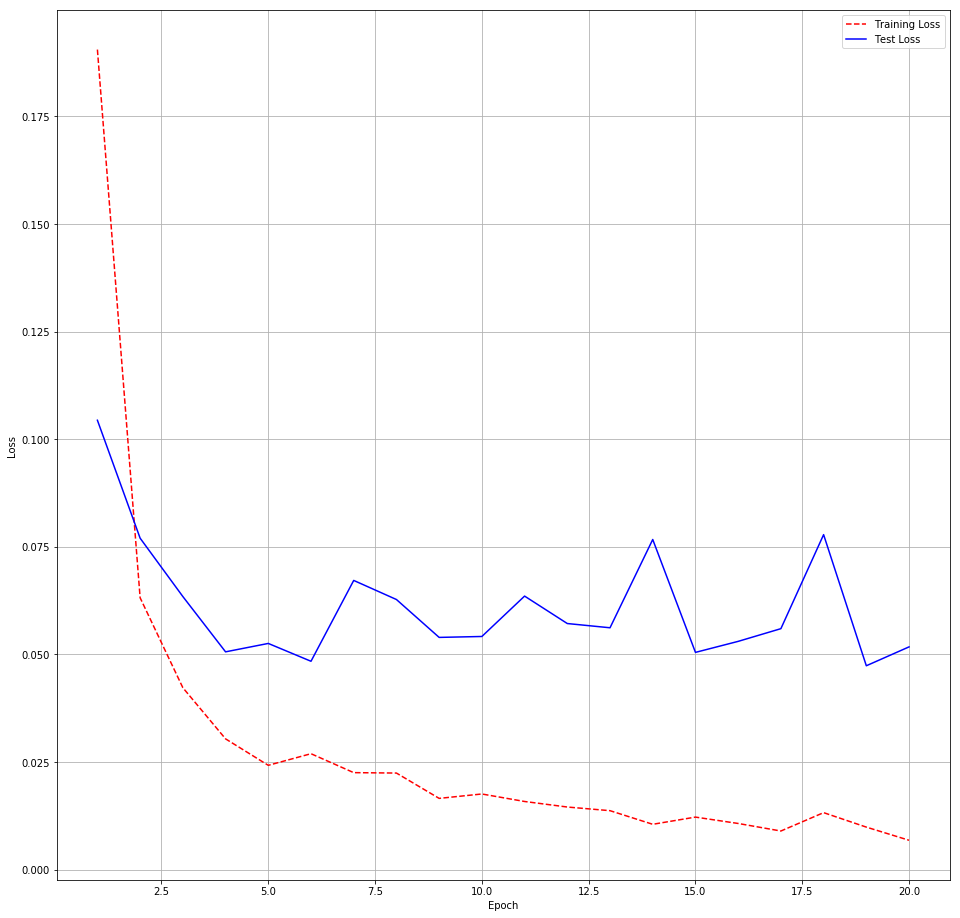

Test score: 0.05174927458126408
Test accuracy: 0.9919


In [20]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt

epoch_count = list(range(1,no_epoch+1))

# Get training and test loss histories
training_loss = history_5.history['loss']
test_loss = history_5.history['val_loss']

# Create count of the number of epochs
score = mdl_5.evaluate(x_test, y_test, verbose=0)
plt_mdl_res(epoch_count, training_loss, test_loss, score[0], score[1])


## Conclusion

In [3]:
import tabulate
res_tab = [['Layer','Batch \nNormalization','Dropout','Dropout \nRate','Test \nAccuracy'],
           [3,'No','No',0.0,0.9938],
           [3,'No','Yes',0.0,0.9928],
           [5,'Yes','No',0.0,0.9934],
           [7,'Yes','Yes',0.0,0.9810],
           [7,'Yes','Yes',0.2,0.9919]           
          ]
print(tabulate.tabulate(res_tab,tablefmt='fancy_grid'))

╒═══════╤═══════════════╤═════════╤══════════╤══════════╕
│ Layer │ Batch         │ Dropout │ Dropout  │ Test     │
│       │ Normalization │         │ Rate     │ Accuracy │
├───────┼───────────────┼─────────┼──────────┼──────────┤
│ 3     │ No            │ No      │ 0.0      │ 0.9938   │
├───────┼───────────────┼─────────┼──────────┼──────────┤
│ 3     │ No            │ Yes     │ 0.0      │ 0.9928   │
├───────┼───────────────┼─────────┼──────────┼──────────┤
│ 5     │ Yes           │ No      │ 0.0      │ 0.9934   │
├───────┼───────────────┼─────────┼──────────┼──────────┤
│ 7     │ Yes           │ Yes     │ 0.0      │ 0.981    │
├───────┼───────────────┼─────────┼──────────┼──────────┤
│ 7     │ Yes           │ Yes     │ 0.2      │ 0.9919   │
╘═══════╧═══════════════╧═════════╧══════════╧══════════╛
